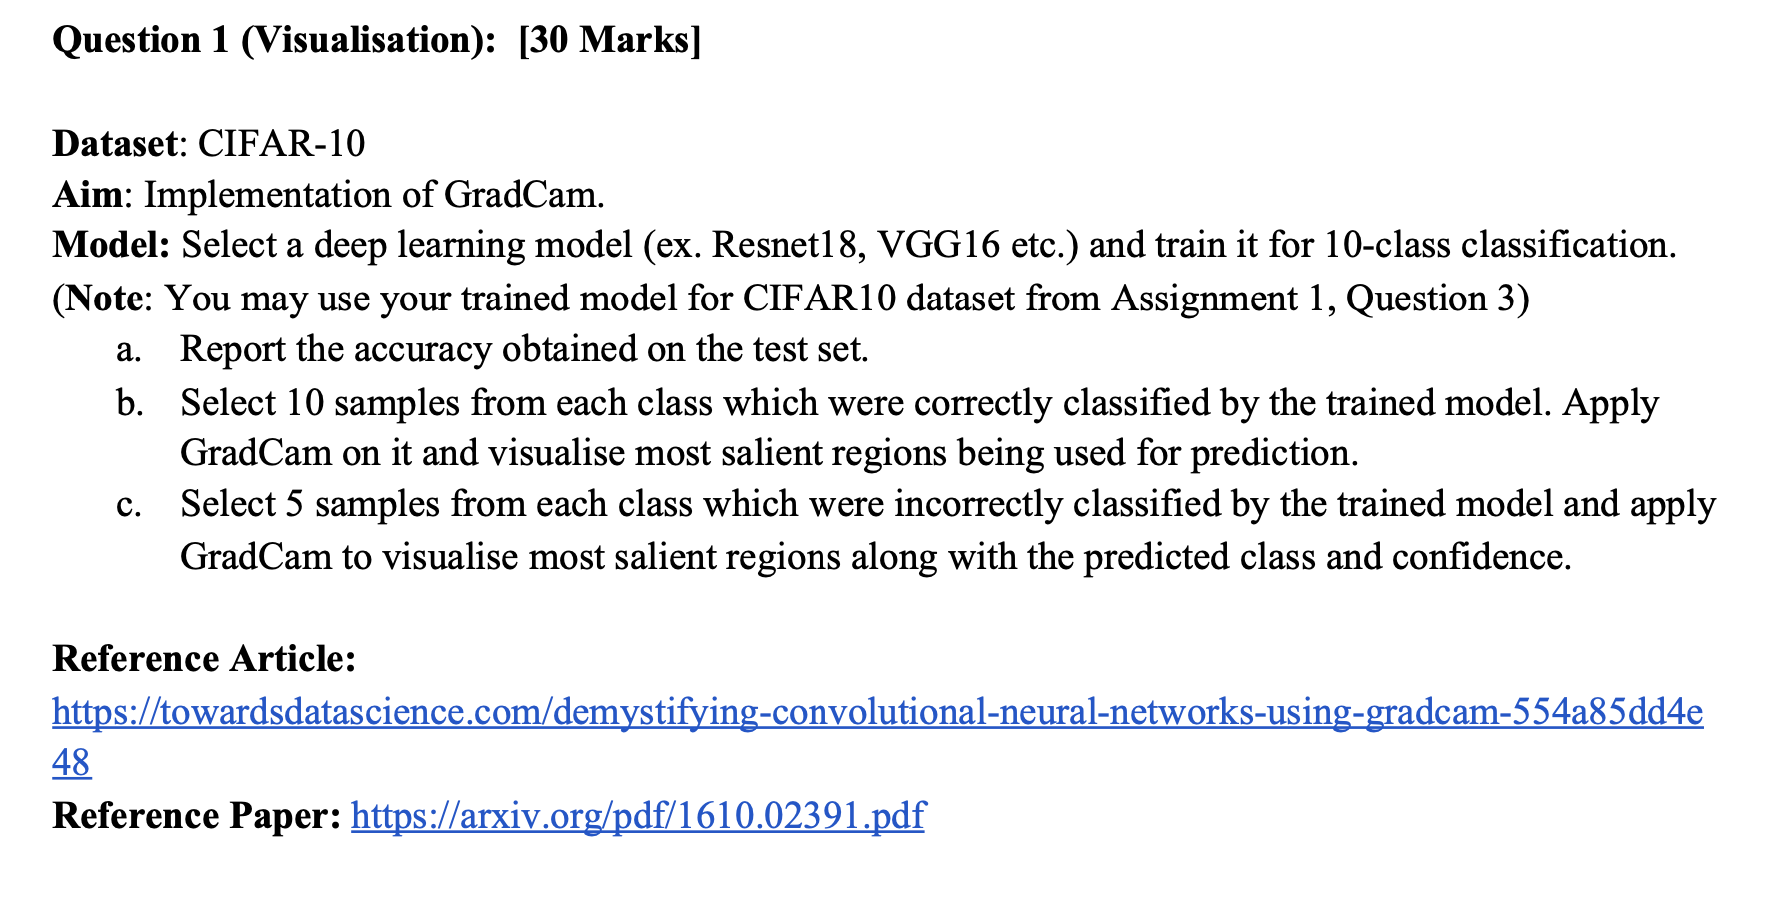

Links - 

Reference Article:
https://towardsdatascience.com/demystifying-convolutional-neural-networks-using-gradcam-554a85dd4e48

Reference Paper:​ ​https://arxiv.org/pdf/1610.02391.pdf

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:

filtered_images=[]
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))
for i in range(0,10):
  idx = (train_labels == i).reshape(train_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images.append(train_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images).shape))

# Train Images
Xtrain_airplane = np.array(filtered_images[0])
Xtrain_automobile = np.array(filtered_images[1])
Xtrain_bird = np.array(filtered_images[2])
Xtrain_cat = np.array(filtered_images[3])
Xtrain_deer = np.array(filtered_images[4])
Xtrain_dog = np.array(filtered_images[5])
Xtrain_frog = np.array(filtered_images[6])
Xtrain_horse = np.array(filtered_images[7])
Xtrain_ship = np.array(filtered_images[8])
Xtrain_truck = np.array(filtered_images[9])

170500096/170498071 [==============================] - 6s 0us/step
Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Filtered Images Shape: (10, 5000, 32, 32, 3)


In [4]:
filtered_labels = []
for i in range(0,10):
  idx = (train_labels == i).reshape(train_labels.shape[0])
  filtered_labels.append(train_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels).shape))
# Train Labels
Ytrain_airplane = filtered_labels[0]
Ytrain_automobile = filtered_labels[1] 
Ytrain_bird = filtered_labels[2]
Ytrain_cat = filtered_labels[3]
Ytrain_deer = filtered_labels[4]
Ytrain_dog = filtered_labels[5]
Ytrain_frog = filtered_labels[6] 
Ytrain_horse = filtered_labels[7]
Ytrain_ship = filtered_labels[8]
Ytrain_truck = filtered_labels[9]

Filtered labels Shape: (10, 5000, 1)


In [5]:
filtered_images_test = []
for i in range(0,10):
  idx = (test_labels == i).reshape(test_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images_test.append(test_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images_test).shape))
# Test Images
Xtest_airplane = np.array(filtered_images_test[0])
Xtest_automobile = np.array(filtered_images_test[1])
Xtest_bird = np.array(filtered_images_test[2])
Xtest_cat = np.array(filtered_images_test[3])
Xtest_deer = np.array(filtered_images_test[4])
Xtest_dog = np.array(filtered_images_test[5])
Xtest_frog = np.array(filtered_images_test[6])
Xtest_horse = np.array(filtered_images_test[7])
Xtest_ship = np.array(filtered_images_test[8])
Xtest_truck = np.array(filtered_images_test[9])

filtered_labels_test = []
for i in range(0,10):
  idx = (test_labels == i).reshape(test_labels.shape[0])
  filtered_labels_test.append(test_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels_test).shape))

# Test Labels
Ytest_airplane = filtered_labels_test[0]
Ytest_automobile = filtered_labels_test[1]
Ytest_bird = filtered_labels_test[2]
Ytest_cat = filtered_labels_test[3]
Ytest_deer = filtered_labels_test[4]
Ytest_dog = filtered_labels_test[5]
Ytest_frog = filtered_labels_test[6]
Ytest_horse = filtered_labels_test[7]
Ytest_ship = filtered_labels_test[8]
Ytest_truck = filtered_labels_test[9]

Filtered Images Shape: (10, 1000, 32, 32, 3)
Filtered labels Shape: (10, 1000, 1)


In [6]:
X_train = np.concatenate((Xtrain_airplane,
                          Xtrain_automobile,
                          Xtrain_bird,
                          Xtrain_cat,
                          Xtrain_deer,
                          Xtrain_dog,
                          Xtrain_frog,
                          Xtrain_horse,
                          Xtrain_ship,
                          Xtrain_truck))

Y_train = np.concatenate((Ytrain_airplane,
                          Ytrain_automobile,
                          Ytrain_bird,
                          Ytrain_cat,
                          Ytrain_deer,
                          Ytrain_dog,
                          Ytrain_frog,
                          Ytrain_horse,
                          Ytrain_ship,
                          Ytrain_truck))

X_test = np.concatenate((Xtest_airplane,
                          Xtest_automobile,
                          Xtest_bird,
                          Xtest_cat,
                          Xtest_deer,
                          Xtest_dog,
                          Xtest_frog,
                          Xtest_horse,
                          Xtest_ship,
                          Xtest_truck))

Y_test = np.concatenate((Ytest_airplane,
                          Ytest_automobile,
                          Ytest_bird,
                          Ytest_cat,
                          Ytest_deer,
                          Ytest_dog,
                          Ytest_frog,
                          Ytest_horse,
                          Ytest_ship,
                          Ytest_truck))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
classes = ["airplane",#0
           "automobile",#1
           "bird",#2
           "cat",#3
           "deer",#4
           "dog",#5
           "frog",#6
           "horse",#7
           "ship",#8
           "truck"#9
           ]

The image in training set is desiplayed as:
The label associated with this image is in training set:
0
airplane


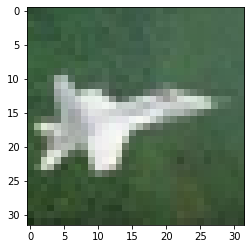

In [8]:

def show_label_and_image(X,Y,index):
  print("The image in training set is desiplayed as:")
  plt.imshow(np.array(X[index]))
  print("The label associated with this image is in training set:")
  print(Y[index][0])
  print(classes[Y[index][0]])
show_label_and_image(X_train, Y_train, 4)

# PART A

In [9]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=30)
model.save('final_model.h5')

Epoch 1/30
1563/1563 [==============================] - 19s 8ms/step - loss: 2.3820 - accuracy: 0.1845
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6104 - accuracy: 0.4146
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3399 - accuracy: 0.5242
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1970 - accuracy: 0.5777
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0753 - accuracy: 0.6238
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9629 - accuracy: 0.6658
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8881 - accuracy: 0.6919
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8159 - accuracy: 0.7157
Epoch 9/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7373 - accuracy: 0.7413
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step - l

In [10]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print(acc*100)

66.430002450943


In [11]:
X_test[0].shape
print(np.argmax(model.predict(np.array([X_test[0]]))))

0


In [12]:
# Storing Correctly Classified Samples from each class to an array.
correctly_classified_airplane = []
correctly_classified_automobile = []
correctly_classified_bird = []
correctly_classified_cat = []
correctly_classified_deer = []
correctly_classified_dog = []
correctly_classified_frog = []
correctly_classified_horse = []
correctly_classified_ship = []
correctly_classified_truck = []


In [13]:
# For Airplane
count=0
for i in range(len(Ytest_airplane)):
  if(Ytest_airplane[i] == np.argmax(model.predict(np.array([Xtest_airplane[i]])))):
    count = count+1
    correctly_classified_airplane.append(np.array([Xtest_airplane[i]]))
    if(count==10):
      break  
print(len(correctly_classified_airplane))
print(np.array(correctly_classified_airplane).shape)
print(np.array(correctly_classified_airplane).reshape((10,32,32,3)).shape)
correctly_classified_airplane = np.array(correctly_classified_airplane).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [14]:
# For automobile
count=0
for i in range(len(Ytest_automobile)):
  if(Ytest_automobile[i] == np.argmax(model.predict(np.array([Xtest_automobile[i]])))):
    count = count+1
    correctly_classified_automobile.append(np.array([Xtest_automobile[i]]))
    if(count==10):
      break  
print(len(correctly_classified_automobile))
print(np.array(correctly_classified_automobile).shape)
print(np.array(correctly_classified_automobile).reshape((10,32,32,3)).shape)
correctly_classified_automobile = np.array(correctly_classified_automobile).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [15]:
# For bird
count=0
for i in range(len(Ytest_bird)):
  if(Ytest_bird[i] == np.argmax(model.predict(np.array([Xtest_bird[i]])))):
    count = count+1
    correctly_classified_bird.append(np.array([Xtest_bird[i]]))
    if(count==10):
      break  
print(len(correctly_classified_bird))
print(np.array(correctly_classified_bird).shape)
print(np.array(correctly_classified_bird).reshape((10,32,32,3)).shape)
correctly_classified_bird = np.array(correctly_classified_bird).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [16]:
# For cat
count=0
for i in range(len(Ytest_cat)):
  if(Ytest_cat[i] == np.argmax(model.predict(np.array([Xtest_cat[i]])))):
    count = count+1
    correctly_classified_cat.append(np.array([Xtest_cat[i]]))
    if(count==10):
      break  
print(len(correctly_classified_cat))
print(np.array(correctly_classified_cat).shape)
print(np.array(correctly_classified_cat).reshape((10,32,32,3)).shape)
correctly_classified_cat = np.array(correctly_classified_cat).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [17]:
# For deer
count=0
for i in range(len(Ytest_deer)):
  if(Ytest_deer[i] == np.argmax(model.predict(np.array([Xtest_deer[i]])))):
    count = count+1
    correctly_classified_deer.append(np.array([Xtest_deer[i]]))
    if(count==10):
      break  
print(len(correctly_classified_deer))
print(np.array(correctly_classified_deer).shape)
print(np.array(correctly_classified_deer).reshape((10,32,32,3)).shape)
correctly_classified_deer = np.array(correctly_classified_deer).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [18]:
# For dog
count=0
for i in range(len(Ytest_dog)):
  if(Ytest_dog[i] == np.argmax(model.predict(np.array([Xtest_dog[i]])))):
    count = count+1
    correctly_classified_dog.append(np.array([Xtest_dog[i]]))
    if(count==10):
      break  
print(len(correctly_classified_dog))
print(np.array(correctly_classified_dog).shape)
print(np.array(correctly_classified_dog).reshape((10,32,32,3)).shape)
correctly_classified_dog = np.array(correctly_classified_dog).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [19]:
# For frog
count=0
for i in range(len(Ytest_frog)):
  if(Ytest_frog[i] == np.argmax(model.predict(np.array([Xtest_frog[i]])))):
    count = count+1
    correctly_classified_frog.append(np.array([Xtest_frog[i]]))
    if(count==10):
      break  
print(len(correctly_classified_frog))
print(np.array(correctly_classified_frog).shape)
print(np.array(correctly_classified_frog).reshape((10,32,32,3)).shape)
correctly_classified_frog = np.array(correctly_classified_frog).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [20]:
# For horse
count=0
for i in range(len(Ytest_horse)):
  if(Ytest_horse[i] == np.argmax(model.predict(np.array([Xtest_horse[i]])))):
    count = count+1
    correctly_classified_horse.append(np.array([Xtest_horse[i]]))
    if(count==10):
      break  
print(len(correctly_classified_horse))
print(np.array(correctly_classified_horse).shape)
print(np.array(correctly_classified_horse).reshape((10,32,32,3)).shape)
correctly_classified_horse = np.array(correctly_classified_horse).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [21]:
# For ship
count=0
for i in range(len(Ytest_ship)):
  if(Ytest_ship[i] == np.argmax(model.predict(np.array([Xtest_ship[i]])))):
    count = count+1
    correctly_classified_ship.append(np.array([Xtest_ship[i]]))
    if(count==10):
      break  
print(len(correctly_classified_ship))
print(np.array(correctly_classified_ship).shape)
print(np.array(correctly_classified_ship).reshape((10,32,32,3)).shape)
correctly_classified_ship = np.array(correctly_classified_ship).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [22]:
# For truck
count=0
for i in range(len(Ytest_truck)):
  if(Ytest_truck[i] == np.argmax(model.predict(np.array([Xtest_truck[i]])))):
    count = count+1
    correctly_classified_truck.append(np.array([Xtest_truck[i]]))
    if(count==10):
      break  
print(len(correctly_classified_truck))
print(np.array(correctly_classified_truck).shape)
print(np.array(correctly_classified_truck).reshape((10,32,32,3)).shape)
correctly_classified_truck = np.array(correctly_classified_truck).reshape((10,32,32,3))

10
(10, 1, 32, 32, 3)
(10, 32, 32, 3)


In [23]:
# Printing shapes for each correct classes what we have got so far!
# Storing Correctly Classified Samples from each class to an array.
print(correctly_classified_airplane.shape)
print(correctly_classified_automobile.shape)
print(correctly_classified_bird.shape)
print(correctly_classified_cat.shape)
print(correctly_classified_deer.shape)
print(correctly_classified_dog.shape)
print(correctly_classified_frog.shape)
print(correctly_classified_horse.shape)
print(correctly_classified_ship.shape)
print(correctly_classified_truck.shape)


(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)
(10, 32, 32, 3)


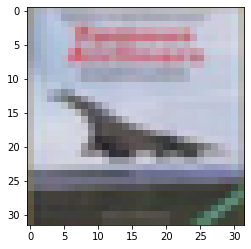

In [24]:
for eachimg in correctly_classified_airplane:
  plt.imshow(eachimg)
  break

In [25]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [26]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-5].output,model.layers[-1].output))

In [27]:
cam_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0     

# PART B

In [27]:
# for visualizations ref: https://github.com/Divyanshupy/CLASS-ACTIVATION-MAPS/blob/master/Class%20Activation%20Maps%20with%20MaxPooling.ipynb

# For Airplane

(32, 32, 128)
(128,)


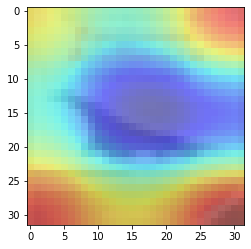

(32, 32, 128)
(128,)


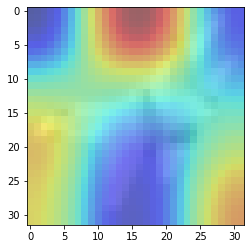

(32, 32, 128)
(128,)


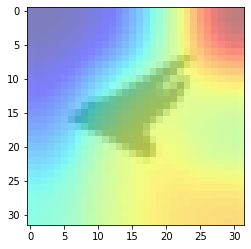

(32, 32, 128)
(128,)


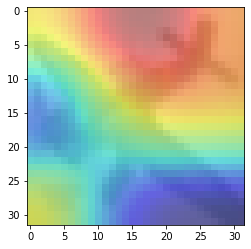

(32, 32, 128)
(128,)


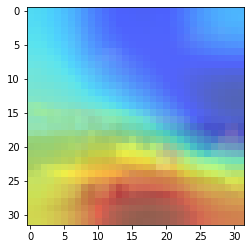

(32, 32, 128)
(128,)


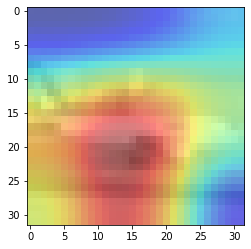

(32, 32, 128)
(128,)


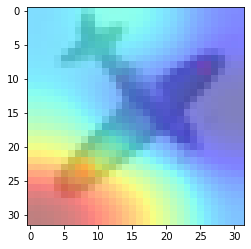

(32, 32, 128)
(128,)


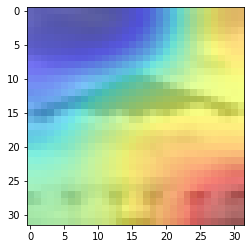

(32, 32, 128)
(128,)


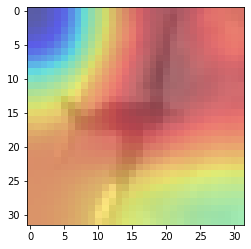

(32, 32, 128)
(128,)


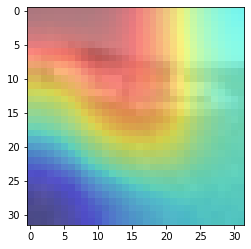

In [28]:
# For Airplane
features,results = cam_model.predict(correctly_classified_airplane)
features.shape
for idx in range(10):
    correctly_classified_airplane[idx] = np.expand_dims(correctly_classified_airplane[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_airplane.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_airplane.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,0]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_airplane[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Automobile

(32, 32, 128)
(128,)


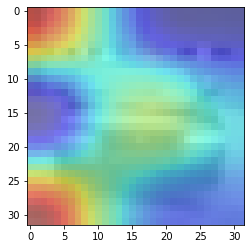

(32, 32, 128)
(128,)


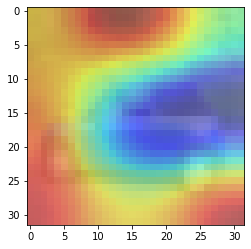

(32, 32, 128)
(128,)


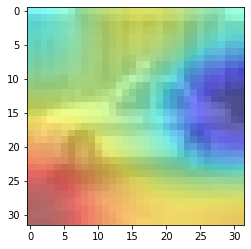

(32, 32, 128)
(128,)


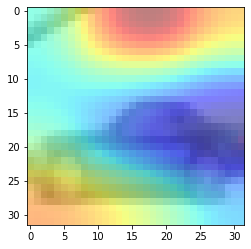

(32, 32, 128)
(128,)


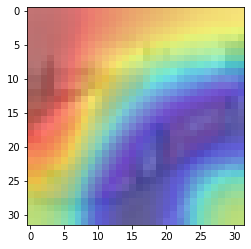

(32, 32, 128)
(128,)


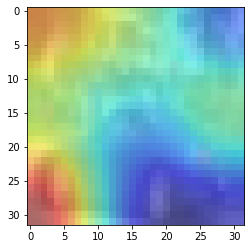

(32, 32, 128)
(128,)


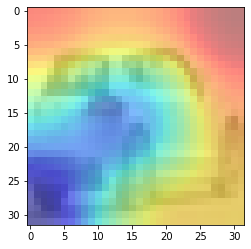

(32, 32, 128)
(128,)


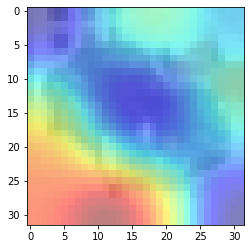

(32, 32, 128)
(128,)


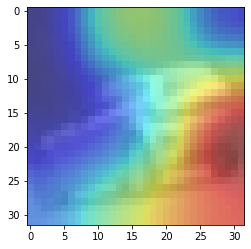

(32, 32, 128)
(128,)


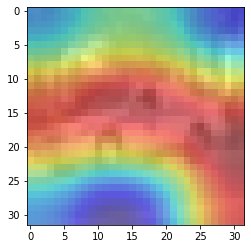

In [29]:
# For automobile
features,results = cam_model.predict(correctly_classified_automobile)
features.shape
for idx in range(10):
    correctly_classified_automobile[idx] = np.expand_dims(correctly_classified_automobile[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_automobile.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_automobile.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,1]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_automobile[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Bird

(32, 32, 128)
(128,)


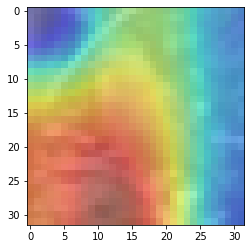

(32, 32, 128)
(128,)


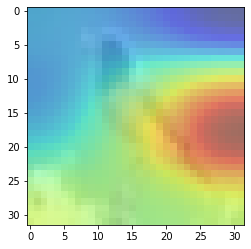

(32, 32, 128)
(128,)


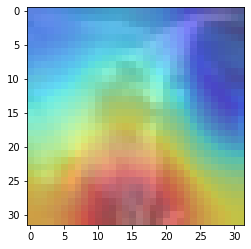

(32, 32, 128)
(128,)


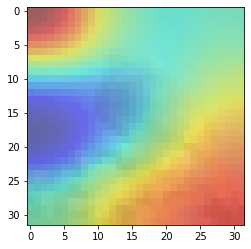

(32, 32, 128)
(128,)


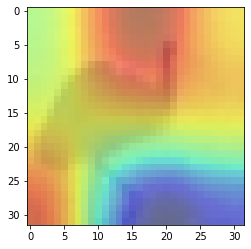

(32, 32, 128)
(128,)


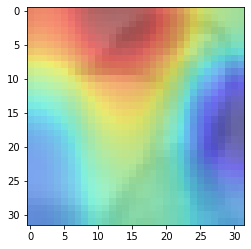

(32, 32, 128)
(128,)


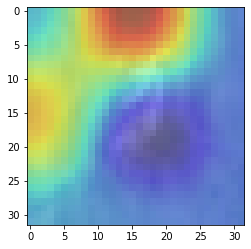

(32, 32, 128)
(128,)


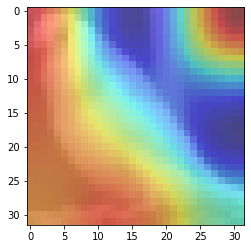

(32, 32, 128)
(128,)


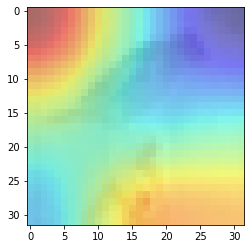

(32, 32, 128)
(128,)


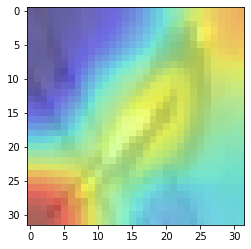

In [31]:
# For bird
features,results = cam_model.predict(correctly_classified_bird)
features.shape
for idx in range(10):
    correctly_classified_bird[idx] = np.expand_dims(correctly_classified_bird[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_bird.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_bird.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,2]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_bird[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Cat

(32, 32, 128)
(128,)


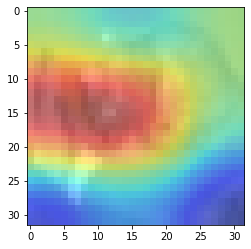

(32, 32, 128)
(128,)


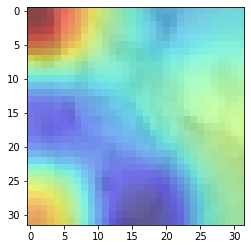

(32, 32, 128)
(128,)


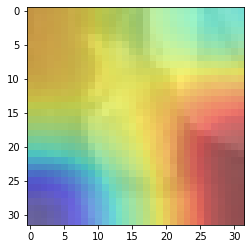

(32, 32, 128)
(128,)


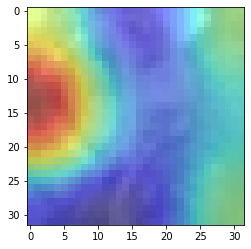

(32, 32, 128)
(128,)


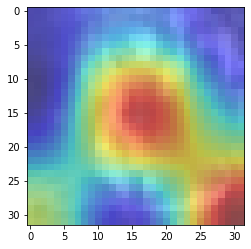

(32, 32, 128)
(128,)


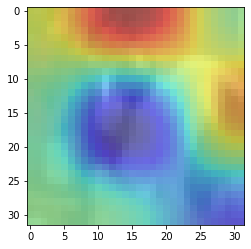

(32, 32, 128)
(128,)


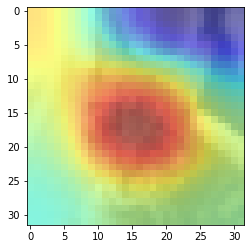

(32, 32, 128)
(128,)


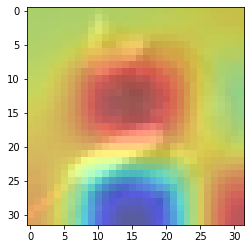

(32, 32, 128)
(128,)


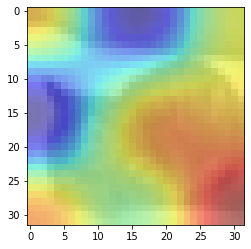

(32, 32, 128)
(128,)


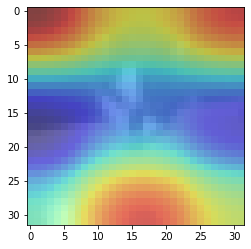

In [32]:
# For cat
features,results = cam_model.predict(correctly_classified_cat)
features.shape
for idx in range(10):
    correctly_classified_cat[idx] = np.expand_dims(correctly_classified_cat[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_cat.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_cat.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,3]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_cat[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Deer

(32, 32, 128)
(128,)


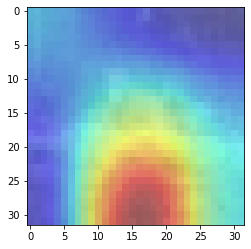

(32, 32, 128)
(128,)


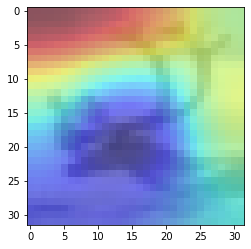

(32, 32, 128)
(128,)


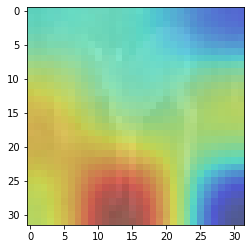

(32, 32, 128)
(128,)


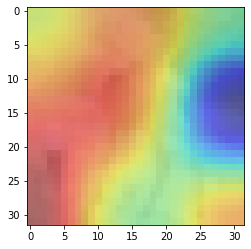

(32, 32, 128)
(128,)


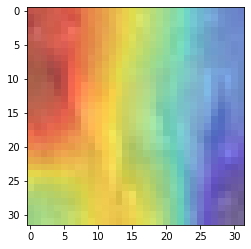

(32, 32, 128)
(128,)


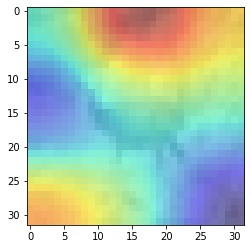

(32, 32, 128)
(128,)


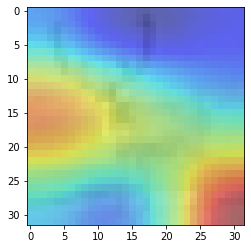

(32, 32, 128)
(128,)


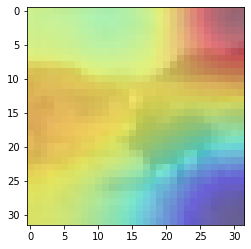

(32, 32, 128)
(128,)


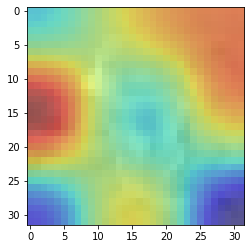

(32, 32, 128)
(128,)


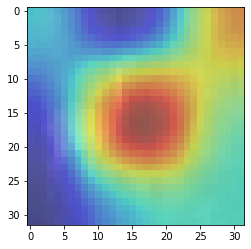

In [33]:
# For deer
features,results = cam_model.predict(correctly_classified_deer)
features.shape
for idx in range(10):
    correctly_classified_deer[idx] = np.expand_dims(correctly_classified_deer[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_deer.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_deer.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,4]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_deer[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Dog

(32, 32, 128)
(128,)


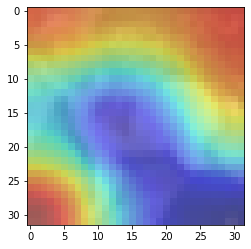

(32, 32, 128)
(128,)


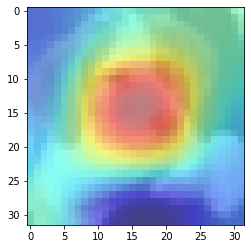

(32, 32, 128)
(128,)


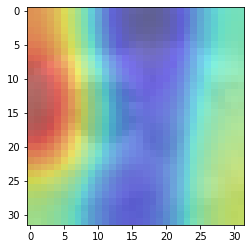

(32, 32, 128)
(128,)


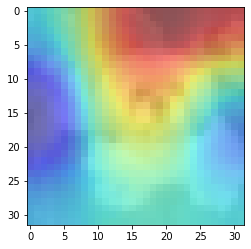

(32, 32, 128)
(128,)


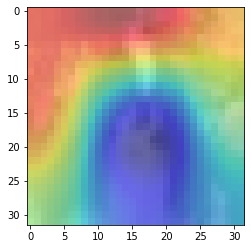

(32, 32, 128)
(128,)


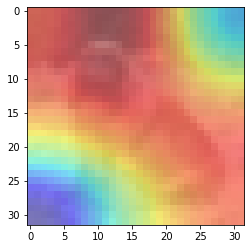

(32, 32, 128)
(128,)


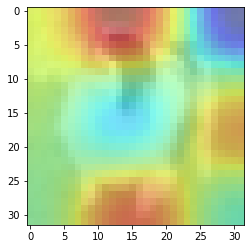

(32, 32, 128)
(128,)


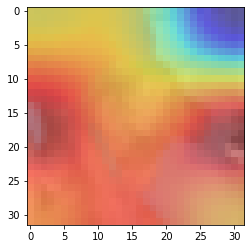

(32, 32, 128)
(128,)


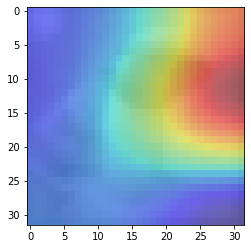

(32, 32, 128)
(128,)


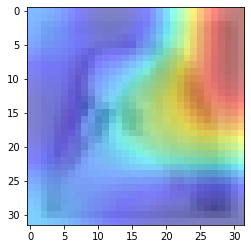

In [34]:
# For dog
features,results = cam_model.predict(correctly_classified_dog)
features.shape
for idx in range(10):
    correctly_classified_dog[idx] = np.expand_dims(correctly_classified_dog[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_dog.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_dog.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,5]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_dog[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Frog

(32, 32, 128)
(128,)


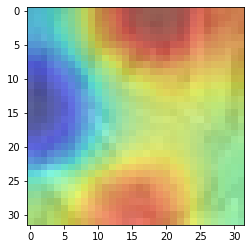

(32, 32, 128)
(128,)


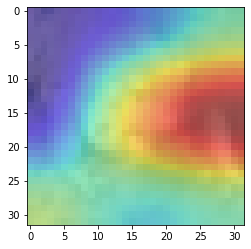

(32, 32, 128)
(128,)


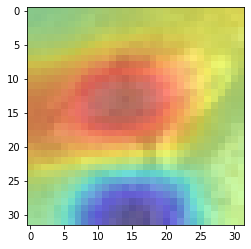

(32, 32, 128)
(128,)


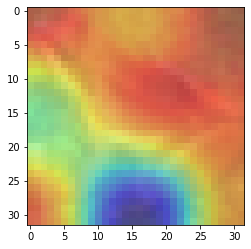

(32, 32, 128)
(128,)


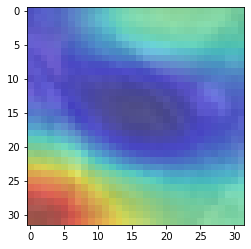

(32, 32, 128)
(128,)


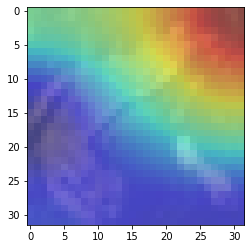

(32, 32, 128)
(128,)


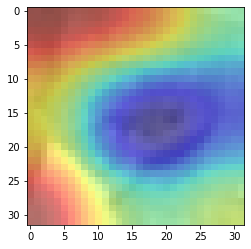

(32, 32, 128)
(128,)


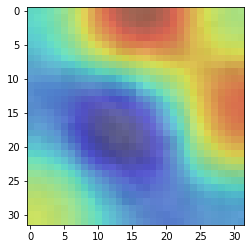

(32, 32, 128)
(128,)


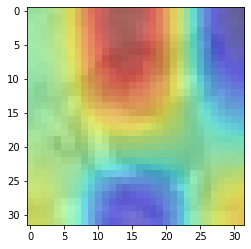

(32, 32, 128)
(128,)


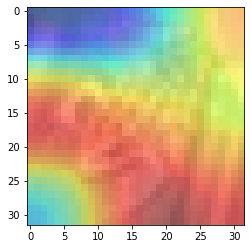

In [35]:
# For frog
features,results = cam_model.predict(correctly_classified_frog)
features.shape
for idx in range(10):
    correctly_classified_frog[idx] = np.expand_dims(correctly_classified_frog[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_frog.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_frog.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,6]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_frog[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Horse

(32, 32, 128)
(128,)


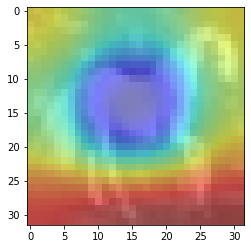

(32, 32, 128)
(128,)


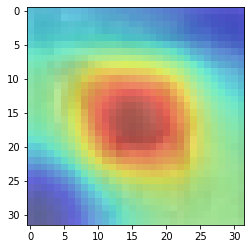

(32, 32, 128)
(128,)


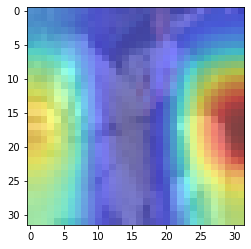

(32, 32, 128)
(128,)


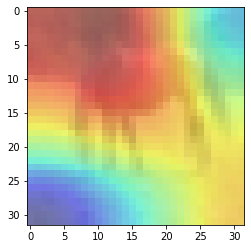

(32, 32, 128)
(128,)


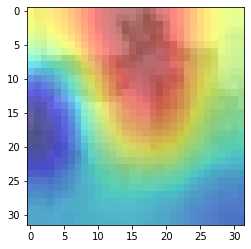

(32, 32, 128)
(128,)


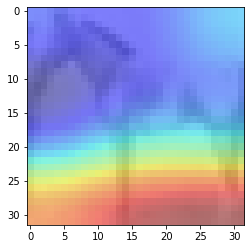

(32, 32, 128)
(128,)


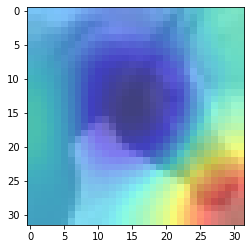

(32, 32, 128)
(128,)


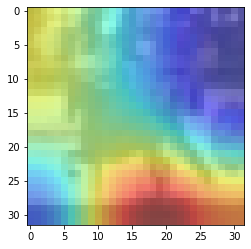

(32, 32, 128)
(128,)


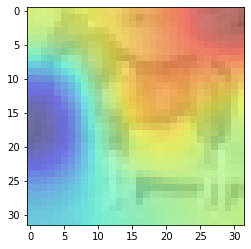

(32, 32, 128)
(128,)


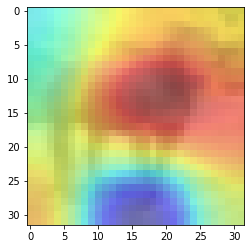

In [36]:
# For horse
features,results = cam_model.predict(correctly_classified_horse)
features.shape
for idx in range(10):
    correctly_classified_horse[idx] = np.expand_dims(correctly_classified_horse[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_horse.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_horse.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,7]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_horse[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Ship

(32, 32, 128)
(128,)


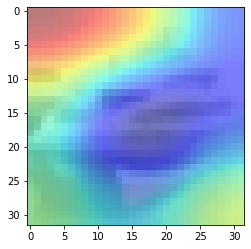

(32, 32, 128)
(128,)


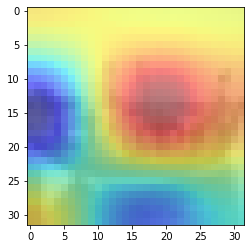

(32, 32, 128)
(128,)


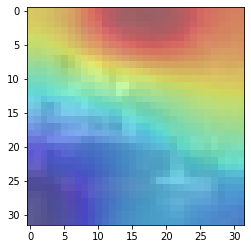

(32, 32, 128)
(128,)


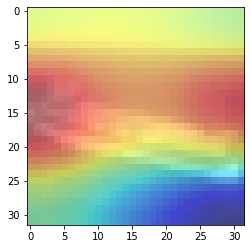

(32, 32, 128)
(128,)


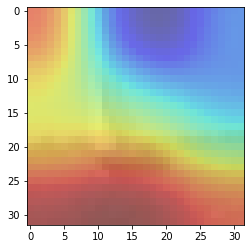

(32, 32, 128)
(128,)


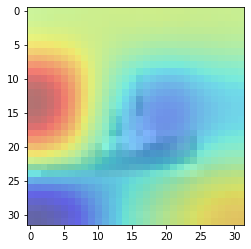

(32, 32, 128)
(128,)


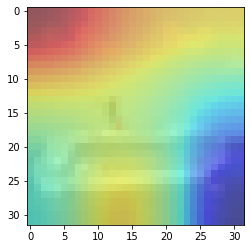

(32, 32, 128)
(128,)


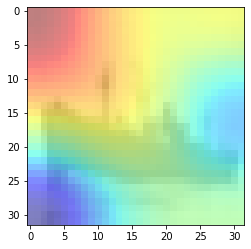

(32, 32, 128)
(128,)


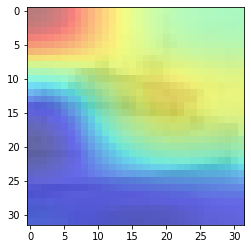

(32, 32, 128)
(128,)


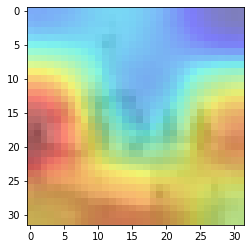

In [37]:
# For ship
features,results = cam_model.predict(correctly_classified_ship)
features.shape
for idx in range(10):
    correctly_classified_ship[idx] = np.expand_dims(correctly_classified_ship[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_ship.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_ship.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,8]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_ship[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Truck

(32, 32, 128)
(128,)


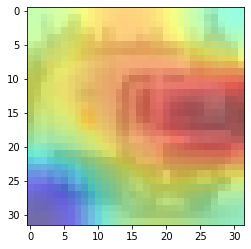

(32, 32, 128)
(128,)


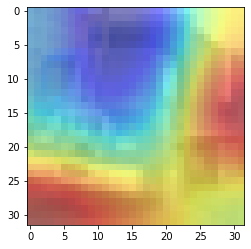

(32, 32, 128)
(128,)


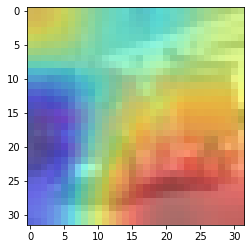

(32, 32, 128)
(128,)


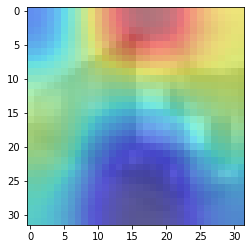

(32, 32, 128)
(128,)


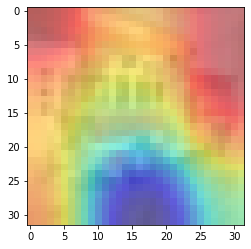

(32, 32, 128)
(128,)


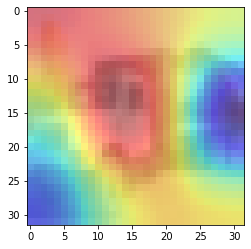

(32, 32, 128)
(128,)


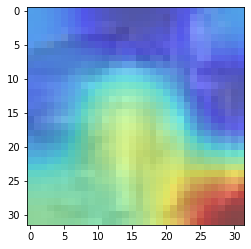

(32, 32, 128)
(128,)


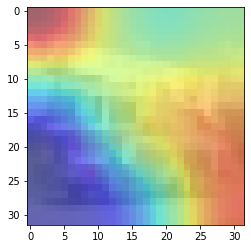

(32, 32, 128)
(128,)


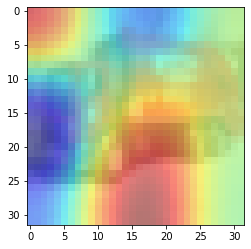

(32, 32, 128)
(128,)


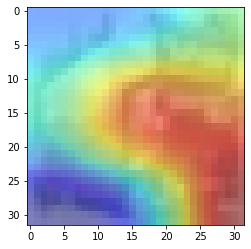

In [38]:
# For truck
features,results = cam_model.predict(correctly_classified_truck)
features.shape
for idx in range(10):
    correctly_classified_truck[idx] = np.expand_dims(correctly_classified_truck[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = correctly_classified_truck.shape[1]/features_for_one_img.shape[0]
    width_roomout  = correctly_classified_truck.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,9]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(correctly_classified_truck[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# PART C

In [39]:
# Storing incorrectly Classified Samples from each class to an array.
incorrectly_classified_airplane = []
incorrectly_classified_automobile = []
incorrectly_classified_bird = []
incorrectly_classified_cat = []
incorrectly_classified_deer = []
incorrectly_classified_dog = []
incorrectly_classified_frog = []
incorrectly_classified_horse = []
incorrectly_classified_ship = []
incorrectly_classified_truck = []


In [40]:
# For Airplane
count=0
for i in range(len(Ytest_airplane)):
  if(Ytest_airplane[i] != np.argmax(model.predict(np.array([Xtest_airplane[i]])))):
    count = count+1
    incorrectly_classified_airplane.append(np.array([Xtest_airplane[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_airplane))
print(np.array(incorrectly_classified_airplane).shape)
print(np.array(incorrectly_classified_airplane).reshape((5,32,32,3)).shape)
incorrectly_classified_airplane = np.array(incorrectly_classified_airplane).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [41]:
# For automobile
count=0
for i in range(len(Ytest_automobile)):
  if(Ytest_automobile[i] != np.argmax(model.predict(np.array([Xtest_automobile[i]])))):
    count = count+1
    incorrectly_classified_automobile.append(np.array([Xtest_automobile[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_automobile))
print(np.array(incorrectly_classified_automobile).shape)
print(np.array(incorrectly_classified_automobile).reshape((5,32,32,3)).shape)
incorrectly_classified_automobile = np.array(incorrectly_classified_automobile).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [42]:
# For bird
count=0
for i in range(len(Ytest_bird)):
  if(Ytest_bird[i] != np.argmax(model.predict(np.array([Xtest_bird[i]])))):
    count = count+1
    incorrectly_classified_bird.append(np.array([Xtest_bird[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_bird))
print(np.array(incorrectly_classified_bird).shape)
print(np.array(incorrectly_classified_bird).reshape((5,32,32,3)).shape)
incorrectly_classified_bird = np.array(incorrectly_classified_bird).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [43]:
# For cat
count=0
for i in range(len(Ytest_cat)):
  if(Ytest_cat[i] != np.argmax(model.predict(np.array([Xtest_cat[i]])))):
    count = count+1
    incorrectly_classified_cat.append(np.array([Xtest_cat[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_cat))
print(np.array(incorrectly_classified_cat).shape)
print(np.array(incorrectly_classified_cat).reshape((5,32,32,3)).shape)
incorrectly_classified_cat = np.array(incorrectly_classified_cat).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [44]:
# For deer
count=0
for i in range(len(Ytest_deer)):
  if(Ytest_deer[i] != np.argmax(model.predict(np.array([Xtest_deer[i]])))):
    count = count+1
    incorrectly_classified_deer.append(np.array([Xtest_deer[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_deer))
print(np.array(incorrectly_classified_deer).shape)
print(np.array(incorrectly_classified_deer).reshape((5,32,32,3)).shape)
incorrectly_classified_deer = np.array(incorrectly_classified_deer).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [45]:
# For dog
count=0
for i in range(len(Ytest_dog)):
  if(Ytest_dog[i] != np.argmax(model.predict(np.array([Xtest_dog[i]])))):
    count = count+1
    incorrectly_classified_dog.append(np.array([Xtest_dog[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_dog))
print(np.array(incorrectly_classified_dog).shape)
print(np.array(incorrectly_classified_dog).reshape((5,32,32,3)).shape)
incorrectly_classified_dog = np.array(incorrectly_classified_dog).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [46]:
# For frog
count=0
for i in range(len(Ytest_frog)):
  if(Ytest_frog[i] != np.argmax(model.predict(np.array([Xtest_frog[i]])))):
    count = count+1
    incorrectly_classified_frog.append(np.array([Xtest_frog[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_frog))
print(np.array(incorrectly_classified_frog).shape)
print(np.array(incorrectly_classified_frog).reshape((5,32,32,3)).shape)
incorrectly_classified_frog = np.array(incorrectly_classified_frog).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [47]:
# For horse
count=0
for i in range(len(Ytest_horse)):
  if(Ytest_horse[i] != np.argmax(model.predict(np.array([Xtest_horse[i]])))):
    count = count+1
    incorrectly_classified_horse.append(np.array([Xtest_horse[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_horse))
print(np.array(incorrectly_classified_horse).shape)
print(np.array(incorrectly_classified_horse).reshape((5,32,32,3)).shape)
incorrectly_classified_horse = np.array(incorrectly_classified_horse).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [48]:
# For ship
count=0
for i in range(len(Ytest_ship)):
  if(Ytest_ship[i] != np.argmax(model.predict(np.array([Xtest_ship[i]])))):
    count = count+1
    incorrectly_classified_ship.append(np.array([Xtest_ship[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_ship))
print(np.array(incorrectly_classified_ship).shape)
print(np.array(incorrectly_classified_ship).reshape((5,32,32,3)).shape)
incorrectly_classified_ship = np.array(incorrectly_classified_ship).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [49]:
# For truck
count=0
for i in range(len(Ytest_truck)):
  if(Ytest_truck[i] != np.argmax(model.predict(np.array([Xtest_truck[i]])))):
    count = count+1
    incorrectly_classified_truck.append(np.array([Xtest_truck[i]]))
    if(count==5):
      break  
print(len(incorrectly_classified_truck))
print(np.array(incorrectly_classified_truck).shape)
print(np.array(incorrectly_classified_truck).reshape((5,32,32,3)).shape)
incorrectly_classified_truck = np.array(incorrectly_classified_truck).reshape((5,32,32,3))

5
(5, 1, 32, 32, 3)
(5, 32, 32, 3)


In [51]:
# Printing shapes for each correct classes what we have got so far!
# Storing inCorrectly Classified Samples from each class to an array.
print(incorrectly_classified_airplane.shape)
print(incorrectly_classified_automobile.shape)
print(incorrectly_classified_bird.shape)
print(incorrectly_classified_cat.shape)
print(incorrectly_classified_deer.shape)
print(incorrectly_classified_dog.shape)
print(incorrectly_classified_frog.shape)
print(incorrectly_classified_horse.shape)
print(incorrectly_classified_ship.shape)
print(incorrectly_classified_truck.shape)


(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)


# For Airplane

(32, 32, 128)
(128,)


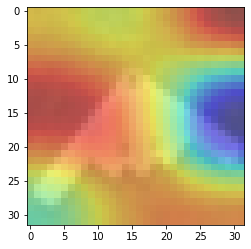

(32, 32, 128)
(128,)


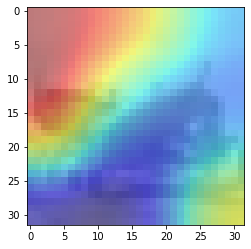

(32, 32, 128)
(128,)


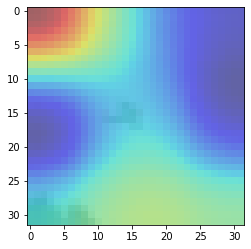

(32, 32, 128)
(128,)


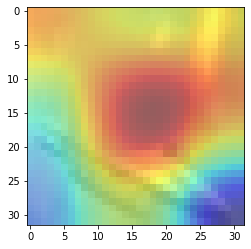

(32, 32, 128)
(128,)


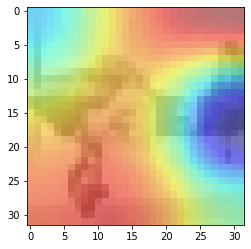

In [52]:
# For Airplane
features,results = cam_model.predict(incorrectly_classified_airplane)
features.shape
for idx in range(5):
    incorrectly_classified_airplane[idx] = np.expand_dims(incorrectly_classified_airplane[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_airplane.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_airplane.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,0]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_airplane[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Automobile

(32, 32, 128)
(128,)


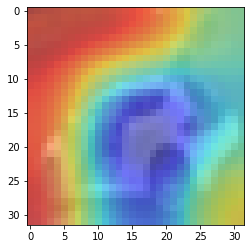

(32, 32, 128)
(128,)


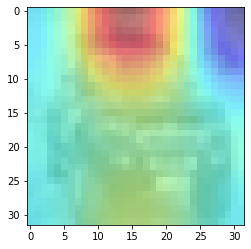

(32, 32, 128)
(128,)


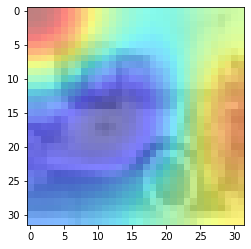

(32, 32, 128)
(128,)


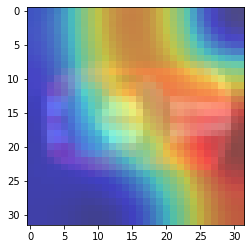

(32, 32, 128)
(128,)


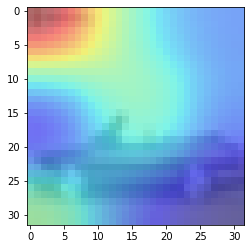

In [53]:
# For automobile
features,results = cam_model.predict(incorrectly_classified_automobile)
features.shape
for idx in range(5):
    incorrectly_classified_automobile[idx] = np.expand_dims(incorrectly_classified_automobile[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_automobile.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_automobile.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,1]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_automobile[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Bird

(32, 32, 128)
(128,)


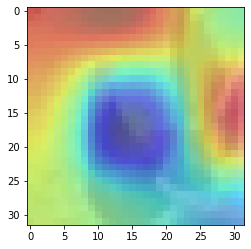

(32, 32, 128)
(128,)


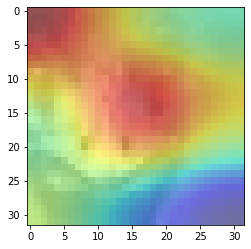

(32, 32, 128)
(128,)


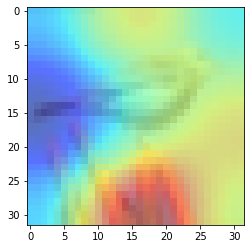

(32, 32, 128)
(128,)


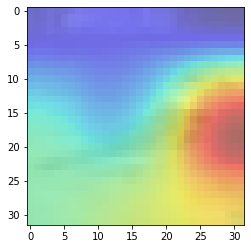

(32, 32, 128)
(128,)


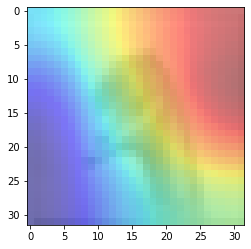

In [54]:
# For bird
features,results = cam_model.predict(incorrectly_classified_bird)
features.shape
for idx in range(5):
    incorrectly_classified_bird[idx] = np.expand_dims(incorrectly_classified_bird[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_bird.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_bird.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,2]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_bird[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Cat

(32, 32, 128)
(128,)


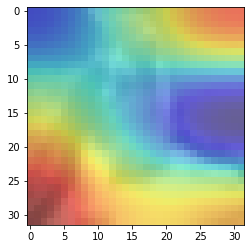

(32, 32, 128)
(128,)


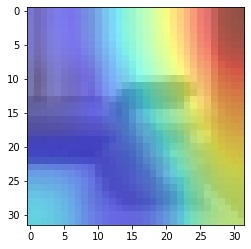

(32, 32, 128)
(128,)


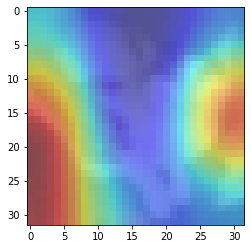

(32, 32, 128)
(128,)


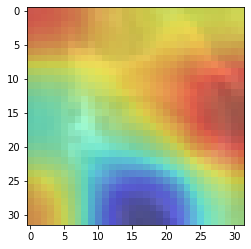

(32, 32, 128)
(128,)


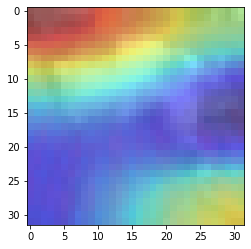

In [55]:
# For cat
features,results = cam_model.predict(incorrectly_classified_cat)
features.shape
for idx in range(5):
    incorrectly_classified_cat[idx] = np.expand_dims(incorrectly_classified_cat[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_cat.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_cat.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,3]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_cat[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Deer

(32, 32, 128)
(128,)


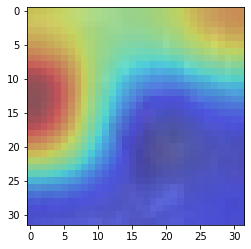

(32, 32, 128)
(128,)


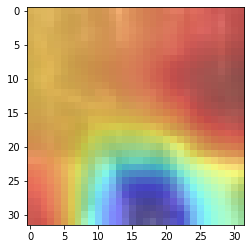

(32, 32, 128)
(128,)


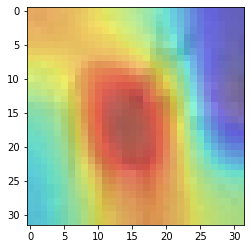

(32, 32, 128)
(128,)


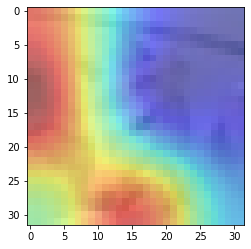

(32, 32, 128)
(128,)


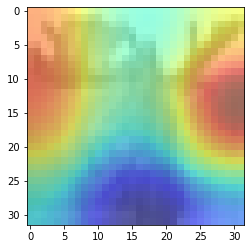

In [56]:
# For deer
features,results = cam_model.predict(incorrectly_classified_deer)
features.shape
for idx in range(5):
    incorrectly_classified_deer[idx] = np.expand_dims(incorrectly_classified_deer[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_deer.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_deer.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,4]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_deer[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Dog

(32, 32, 128)
(128,)


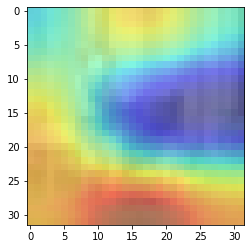

(32, 32, 128)
(128,)


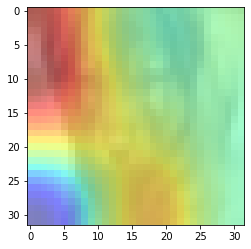

(32, 32, 128)
(128,)


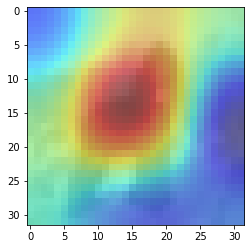

(32, 32, 128)
(128,)


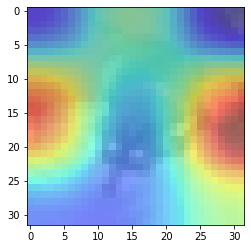

(32, 32, 128)
(128,)


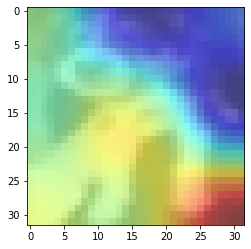

In [57]:
# For dog
features,results = cam_model.predict(incorrectly_classified_dog)
features.shape
for idx in range(5):
    incorrectly_classified_dog[idx] = np.expand_dims(incorrectly_classified_dog[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_dog.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_dog.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,5]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_dog[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Frog

(32, 32, 128)
(128,)


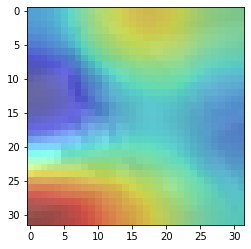

(32, 32, 128)
(128,)


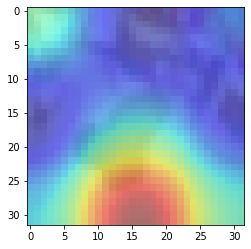

(32, 32, 128)
(128,)


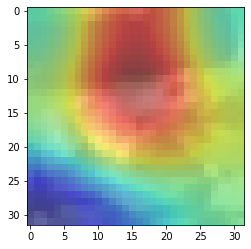

(32, 32, 128)
(128,)


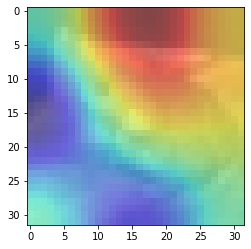

(32, 32, 128)
(128,)


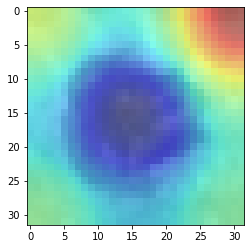

In [58]:
# For frog
features,results = cam_model.predict(incorrectly_classified_frog)
features.shape
for idx in range(5):
    incorrectly_classified_frog[idx] = np.expand_dims(incorrectly_classified_frog[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_frog.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_frog.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,6]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_frog[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Horse

(32, 32, 128)
(128,)


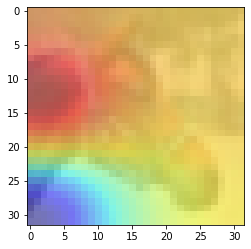

(32, 32, 128)
(128,)


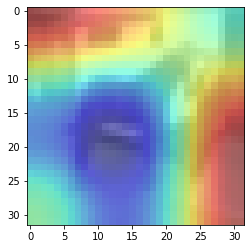

(32, 32, 128)
(128,)


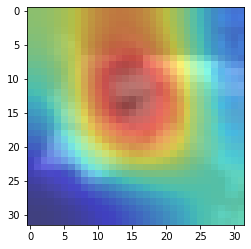

(32, 32, 128)
(128,)


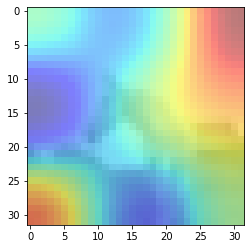

(32, 32, 128)
(128,)


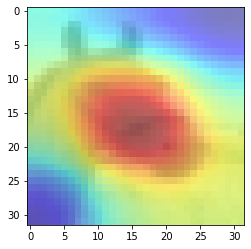

In [59]:
# For horse
features,results = cam_model.predict(incorrectly_classified_horse)
features.shape
for idx in range(5):
    incorrectly_classified_horse[idx] = np.expand_dims(incorrectly_classified_horse[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_horse.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_horse.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,7]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_horse[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Ship

(32, 32, 128)
(128,)


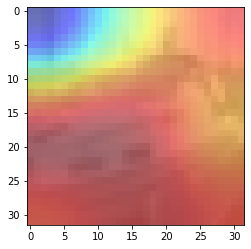

(32, 32, 128)
(128,)


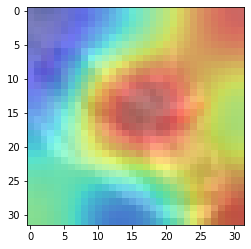

(32, 32, 128)
(128,)


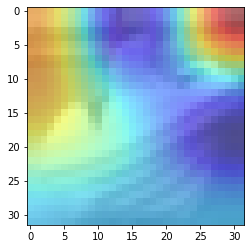

(32, 32, 128)
(128,)


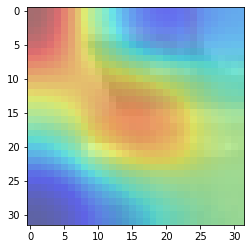

(32, 32, 128)
(128,)


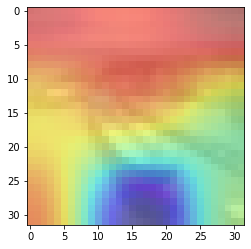

In [60]:
# For ship
features,results = cam_model.predict(incorrectly_classified_ship)
features.shape
for idx in range(5):
    incorrectly_classified_ship[idx] = np.expand_dims(incorrectly_classified_ship[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_ship.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_ship.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,8]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_ship[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()

# For Truck

(32, 32, 128)
(128,)


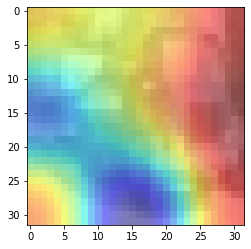

(32, 32, 128)
(128,)


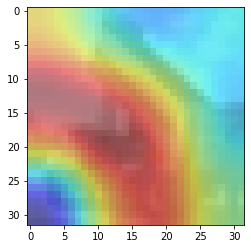

(32, 32, 128)
(128,)


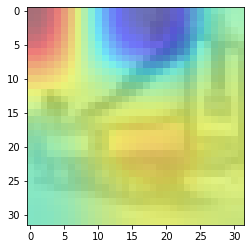

(32, 32, 128)
(128,)


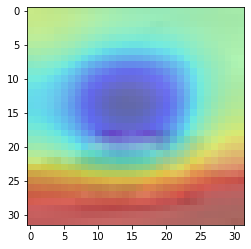

(32, 32, 128)
(128,)


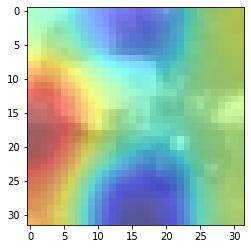

In [61]:
# For truck
features,results = cam_model.predict(incorrectly_classified_truck)
features.shape
for idx in range(5):
    incorrectly_classified_truck[idx] = np.expand_dims(incorrectly_classified_truck[idx],axis=0)
    features_for_one_img = features[idx,:,:,:]
    height_roomout = incorrectly_classified_truck.shape[1]/features_for_one_img.shape[0]
    width_roomout  = incorrectly_classified_truck.shape[2]/features_for_one_img.shape[1]
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,9]
    print(cam_weights.shape)
    cam_output  = np.dot(cam_features,cam_weights)



    plt.imshow(incorrectly_classified_truck[idx], alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()